In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# Load the data
data = pd.read_csv('tel rice.csv')

# Clean column names
data.columns = data.columns.str.strip()

In [3]:

# Initial data checks
print("Missing values:\n", data.isnull().sum())
print("\nData types:\n", data.dtypes)
print("\nSummary statistics:\n", data.describe())
print("\nNumber of duplicates:", data.duplicated().sum())
print("Actual column names in dataset:\n", data.columns.tolist())

Missing values:
 Year                             0
Unnamed: 1                     252
State Name                       0
Dist Name                        0
RICE AREA (1000 ha)              0
RICE PRODUCTION (1000 tons)      0
RICE YIELD (Kg per ha)           0
Precipitation                    0
Temperature                      0
Wind Speed                       0
dtype: int64

Data types:
 Year                             int64
Unnamed: 1                     float64
State Name                      object
Dist Name                       object
RICE AREA (1000 ha)            float64
RICE PRODUCTION (1000 tons)    float64
RICE YIELD (Kg per ha)         float64
Precipitation                  float64
Temperature                    float64
Wind Speed                     float64
dtype: object

Summary statistics:
               Year  Unnamed: 1  RICE AREA (1000 ha)  \
count   252.000000         0.0           252.000000   
mean   2003.500000         NaN           152.441032   
std       8.093

In [4]:
# Define columns of interest (adjust based on actual column names from your dataset)
cols = ['RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)', 'RICE YIELD (Kg per ha)', 
        'Precipitation', 'Temperature', 'Wind Speed']

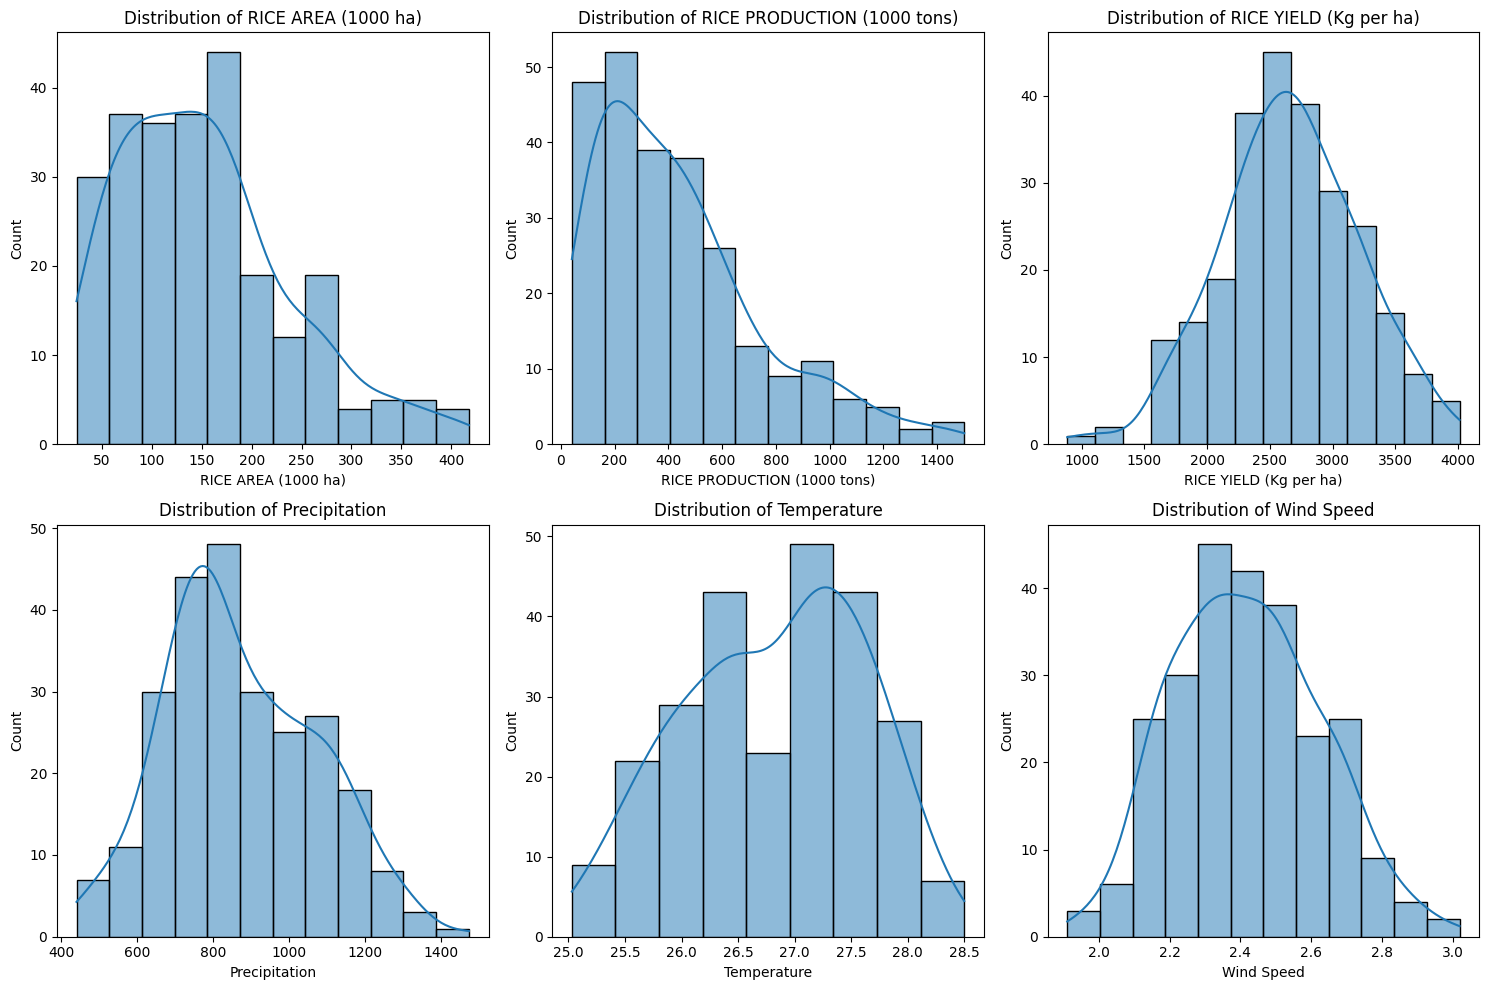

In [5]:
# Histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

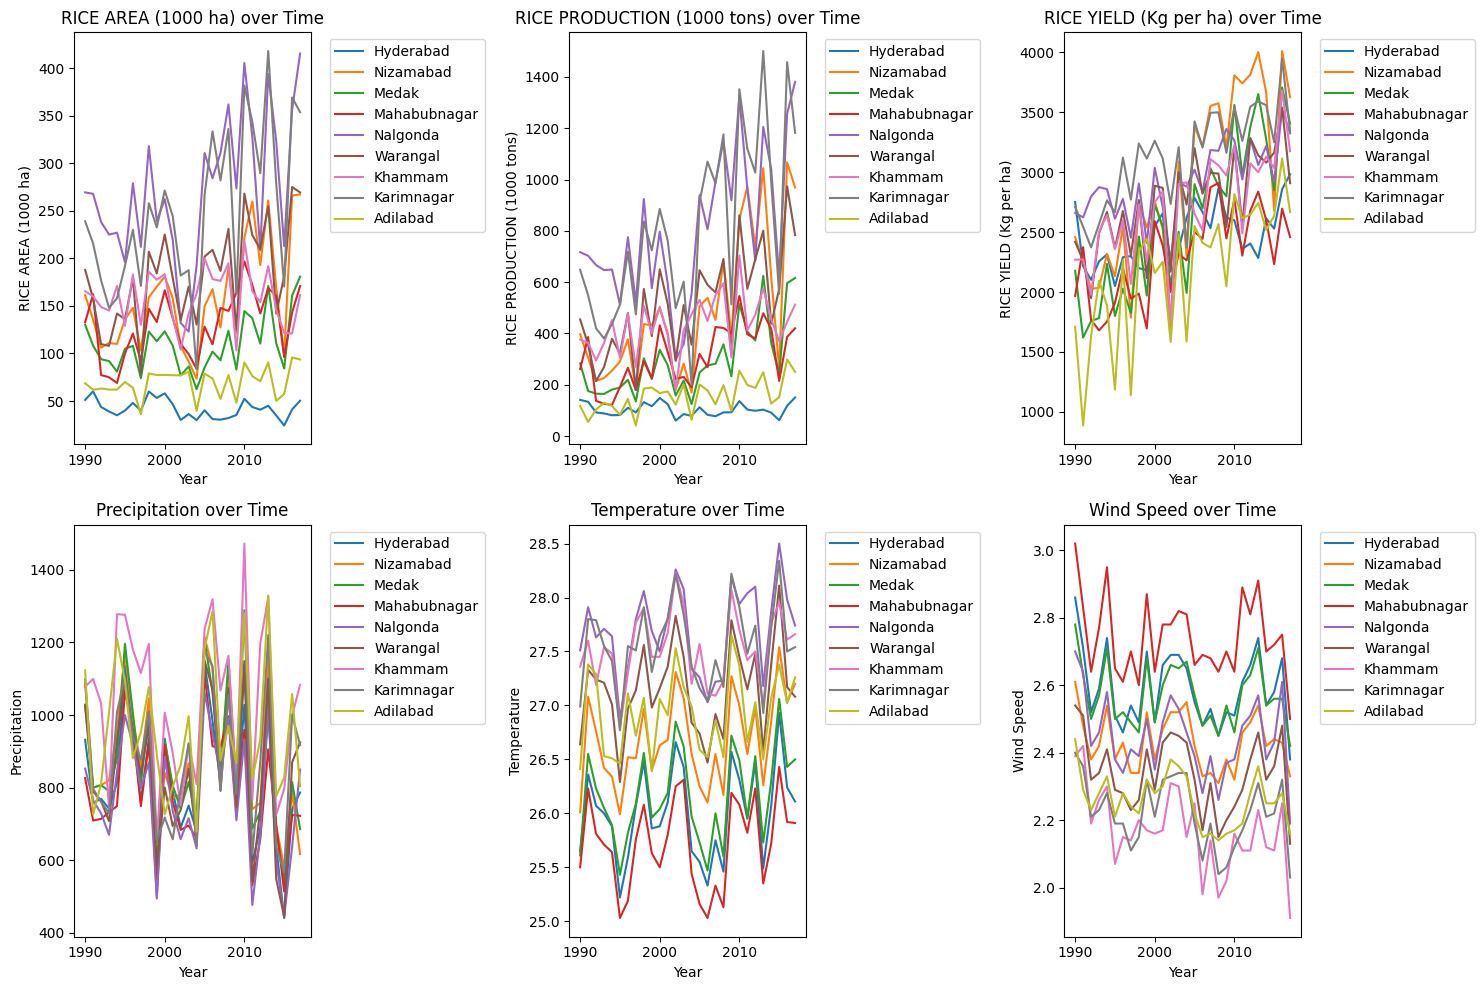

In [6]:
# Time series trends
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    sns.lineplot(data=data, x='Year', y=col, hue='Dist Name')
    plt.title(f'{col} over Time')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

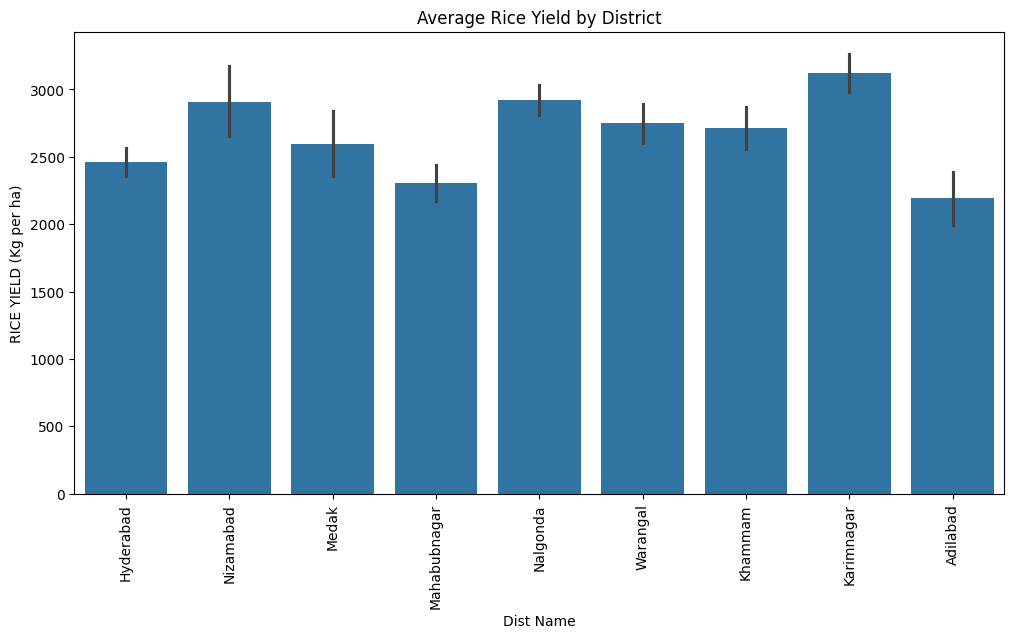

In [7]:
# District-wise average yield
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Dist Name', y='RICE YIELD (Kg per ha)')
plt.xticks(rotation=90)
plt.title('Average Rice Yield by District')
plt.show()


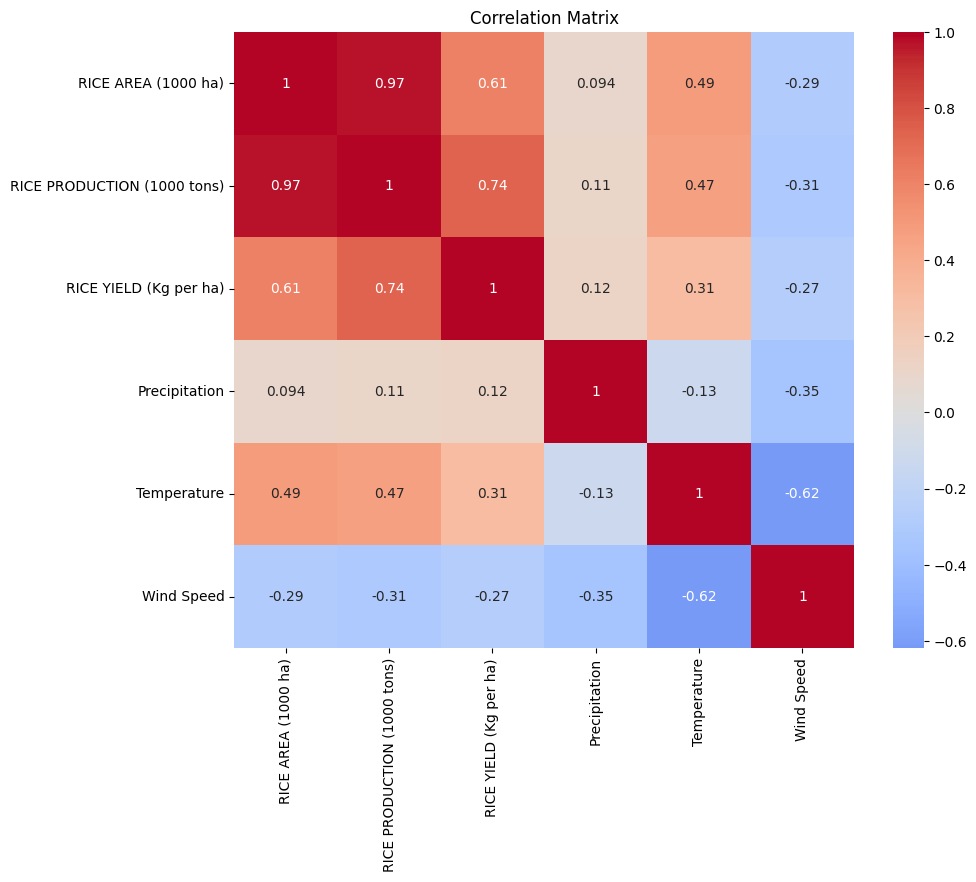

In [8]:
# Correlation matrix
corr_matrix = data[cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

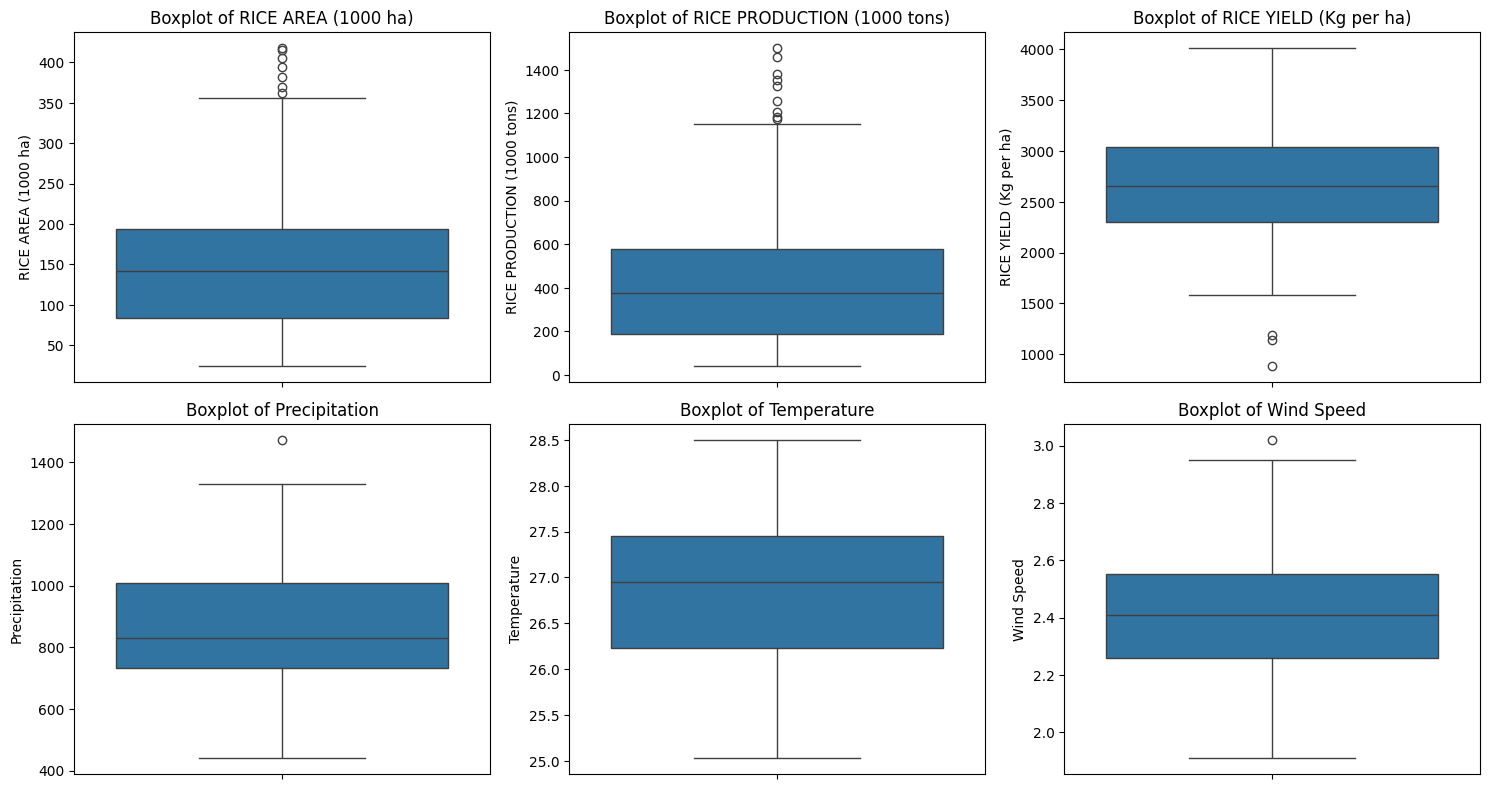

In [9]:
# Boxplots
plt.figure(figsize=(15, 8))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [10]:
# Detect outliers using IQR
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

for col in cols:
    outliers = detect_outliers(data, col)
    print(f"\nOutliers in {col}: {len(outliers)}")
    if len(outliers) > 0:
        print(outliers[['Dist Name', 'Year', col]])


Outliers in RICE AREA (1000 ha): 7
      Dist Name  Year  RICE AREA (1000 ha)
130    Nalgonda  2008               361.81
132    Nalgonda  2010               405.32
135    Nalgonda  2013               393.74
139    Nalgonda  2017               415.25
216  Karimnagar  2010               381.52
219  Karimnagar  2013               417.91
222  Karimnagar  2016               369.13

Outliers in RICE PRODUCTION (1000 tons): 9
      Dist Name  Year  RICE PRODUCTION (1000 tons)
132    Nalgonda  2010                      1323.71
135    Nalgonda  2013                      1205.29
138    Nalgonda  2016                      1256.43
139    Nalgonda  2017                      1380.74
214  Karimnagar  2008                      1176.00
216  Karimnagar  2010                      1351.86
219  Karimnagar  2013                      1500.84
222  Karimnagar  2016                      1457.37
223  Karimnagar  2017                      1182.07

Outliers in RICE YIELD (Kg per ha): 3
    Dist Name  Year  RICE Y

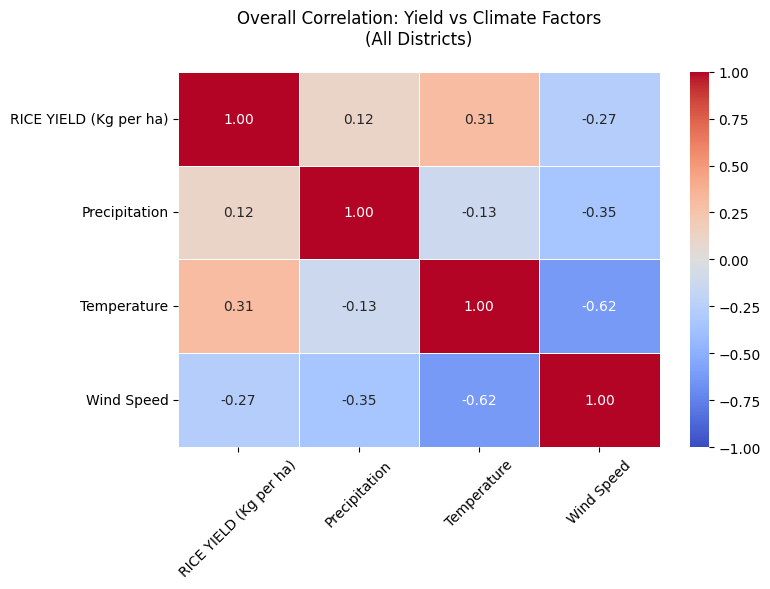

In [11]:
# Correlation with cleaned column names
cols_climate = ['RICE YIELD (Kg per ha)', 'Precipitation', 'Temperature', 'Wind Speed']
corr_matrix = data[cols_climate].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt=".2f", linewidths=0.5)
plt.title('Overall Correlation: Yield vs Climate Factors\n(All Districts)', pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

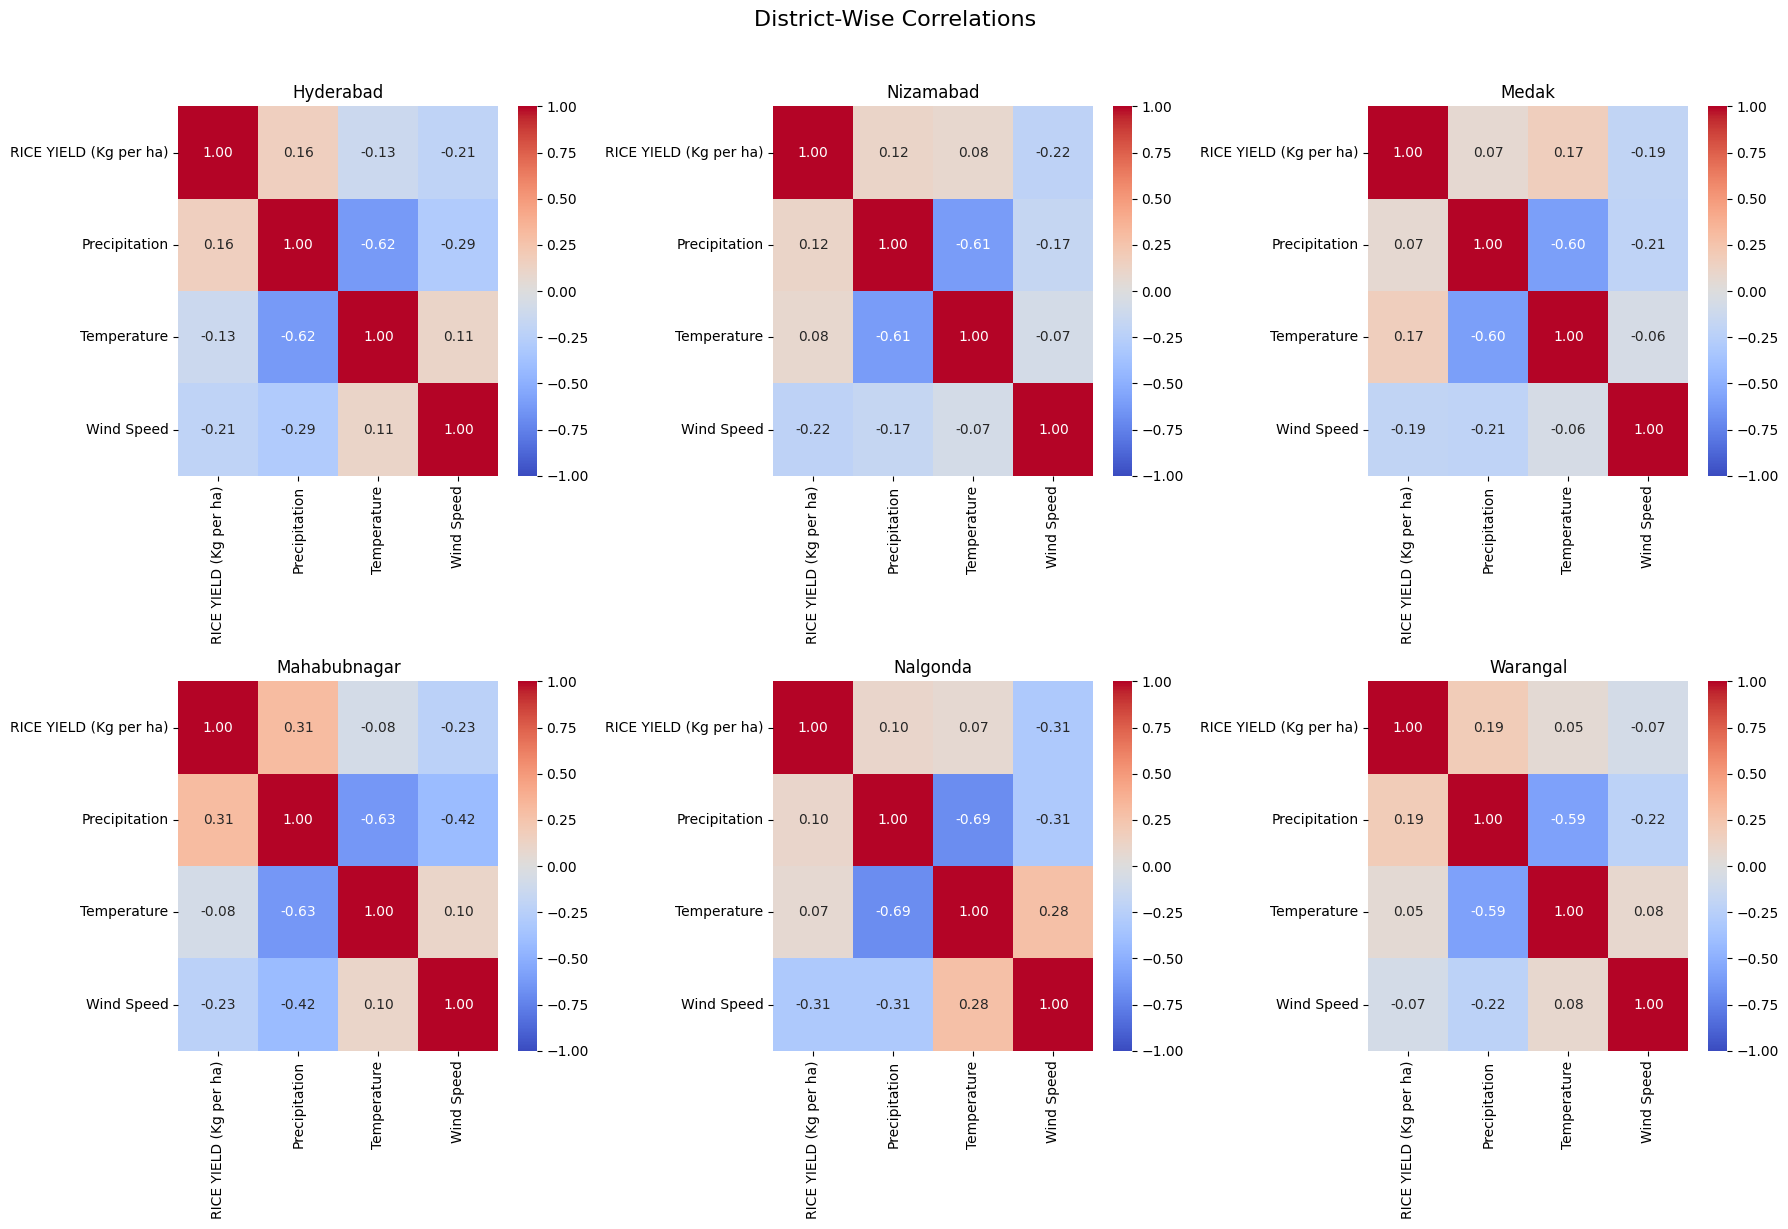

In [12]:
# Top 6 districts by data availability
top_districts = data['Dist Name'].value_counts().index[:6]
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('District-Wise Correlations', y=1.02, fontsize=16)

for dist, ax in zip(top_districts, axes.flatten()):
    dist_data = data[data['Dist Name'] == dist]
    corr = dist_data[cols_climate].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax, vmin=-1, vmax=1, fmt=".2f")
    ax.set_title(dist)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (replace with the actual file path)
data = pd.read_csv('tel rice.csv')

# Clean column names (remove extra spaces)
data.columns = data.columns.str.strip()

# Select relevant columns
cols = ['RICE YIELD (Kg per ha)', 'Precipitation', 'Temperature', 'Wind Speed']

# Calculate the number of subplots needed (one for each unique year)
unique_years = sorted(data['Year'].unique())  # Sort years for consistent plotting
num_years = len(unique_years)

# Calculate number of rows and columns for subplots
n_cols = 3  # Number of columns in the grid
n_rows = (num_years // n_cols) + (num_years % n_cols > 0)  # Calculate number of rows needed

# Create a figure to plot multiple correlation matrices
plt.figure(figsize=(15, 5 * n_rows))  # Adjust figure size based on the number of rows

# Iterate over unique years in the dataset
for i, year in enumerate(unique_years, 1):
    year_data = data[data['Year'] == year]  # Filter data for each year
    corr_matrix = year_data[cols].corr()  # Calculate correlation matrix for that year
    
    # Dynamically calculate subplot position
    plt.subplot(n_rows, n_cols, i)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
    plt.title(f'Correlation Matrix for Year {year}')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'teldata.csv'

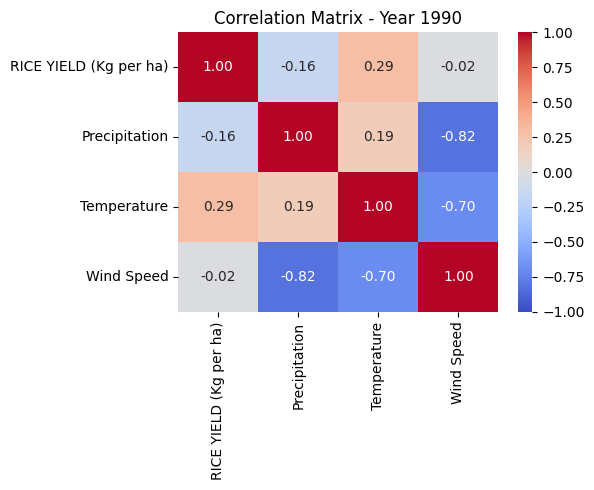

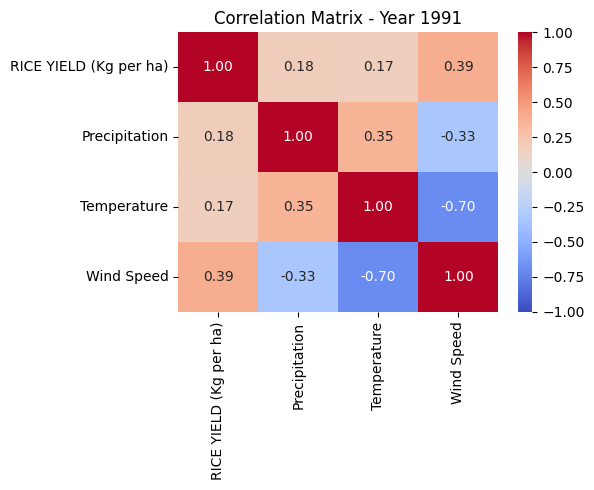

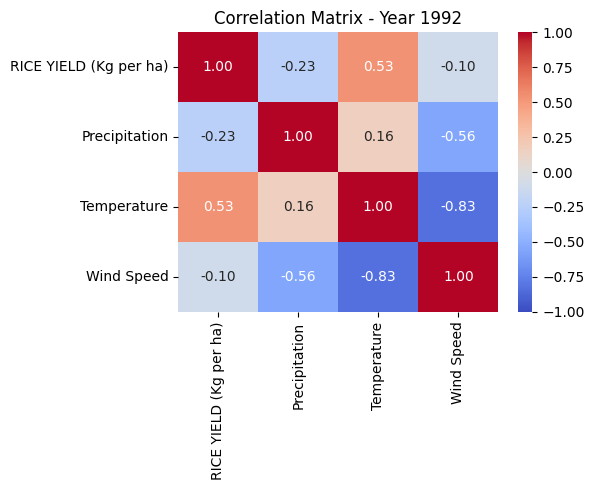

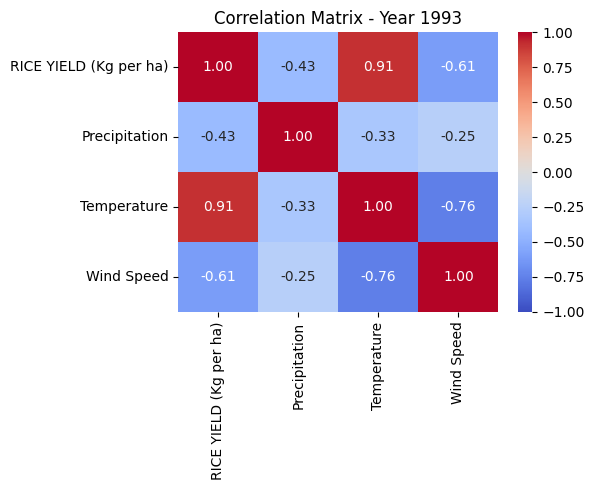

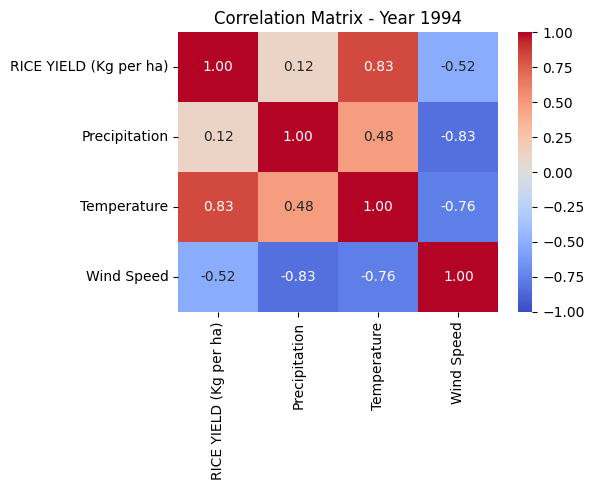

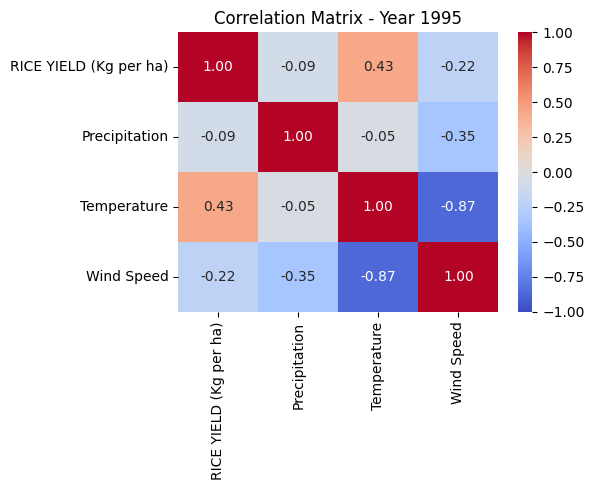

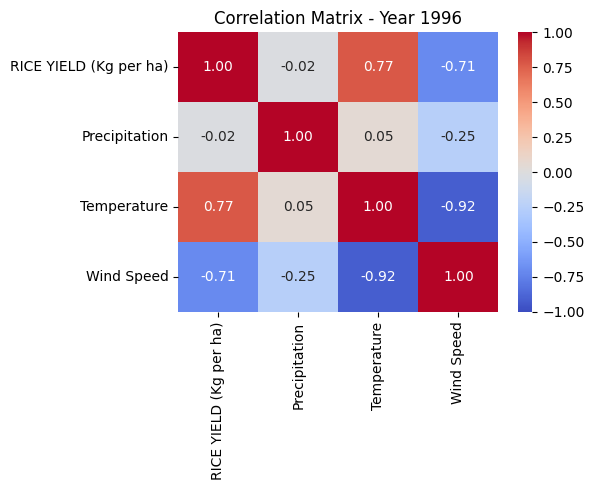

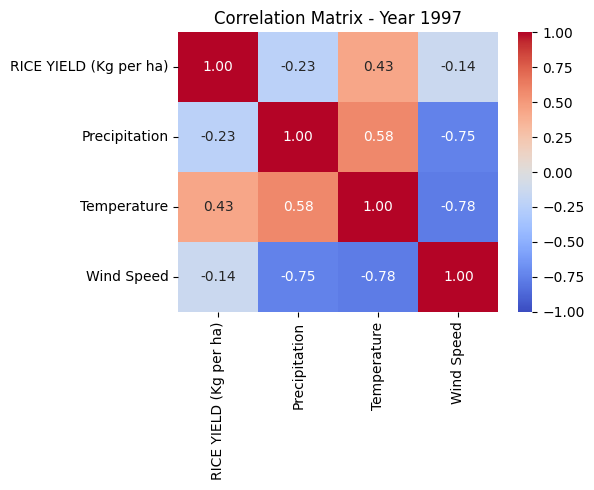

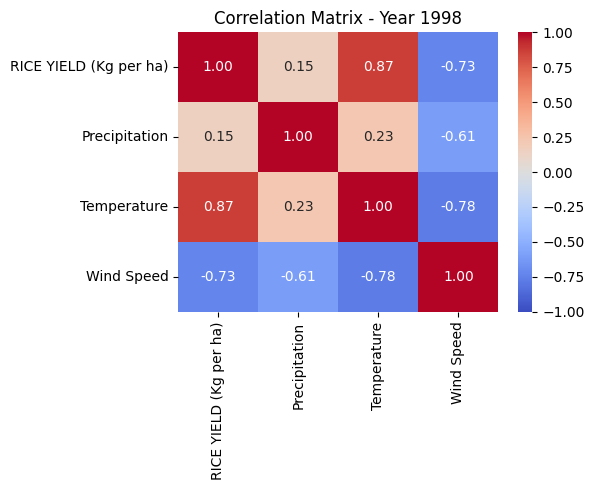

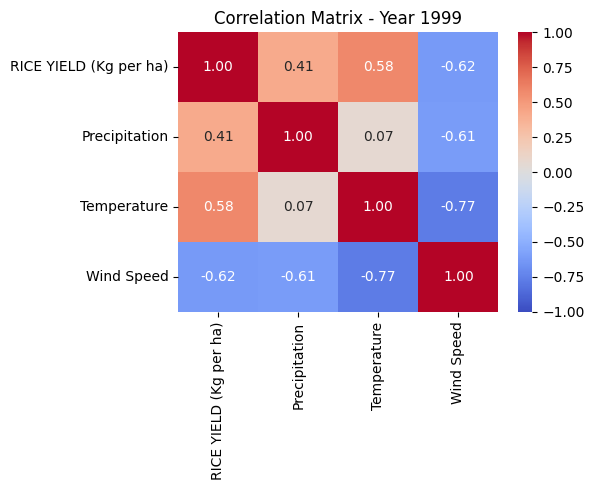

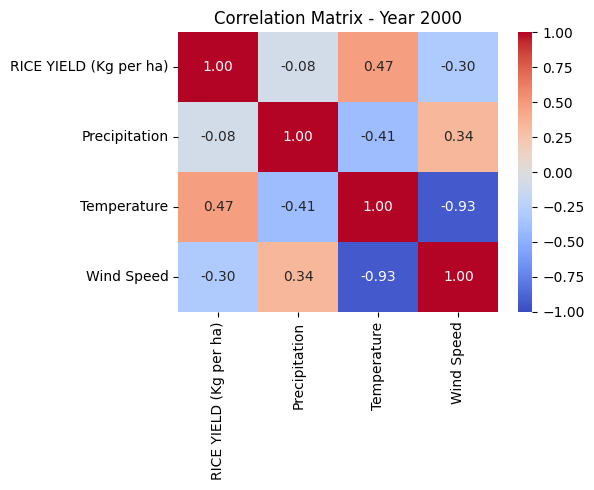

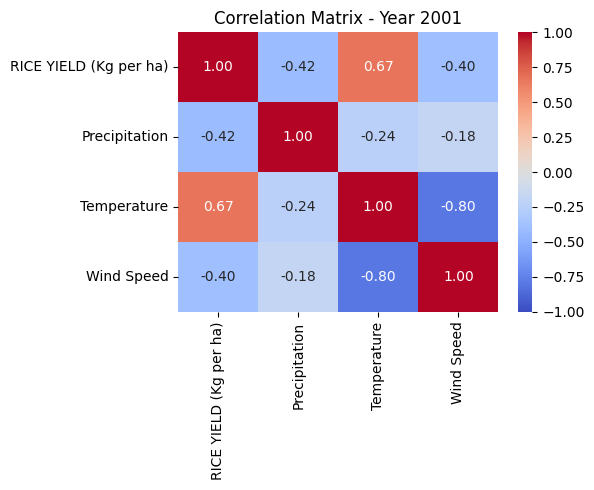

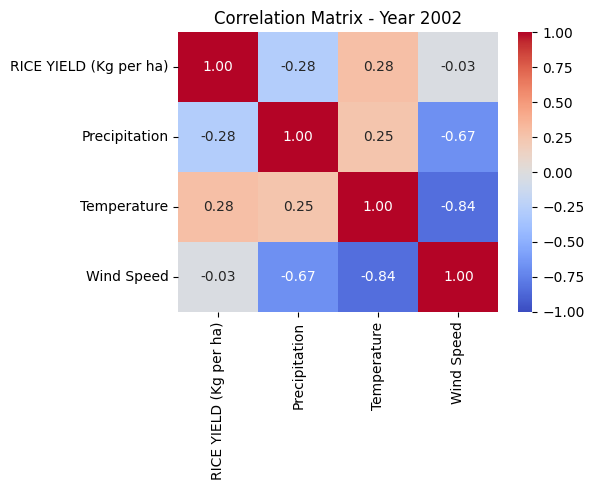

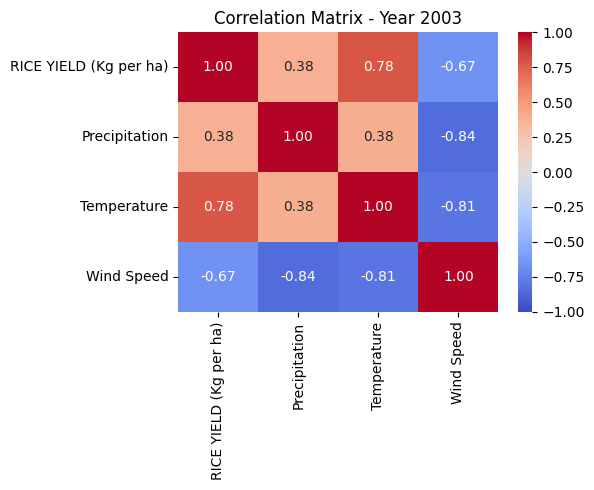

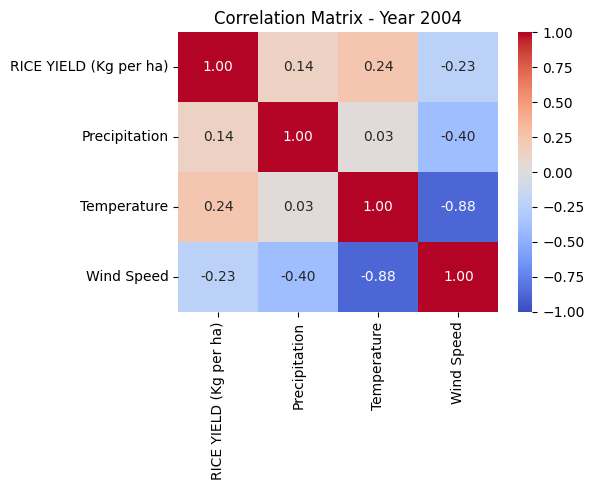

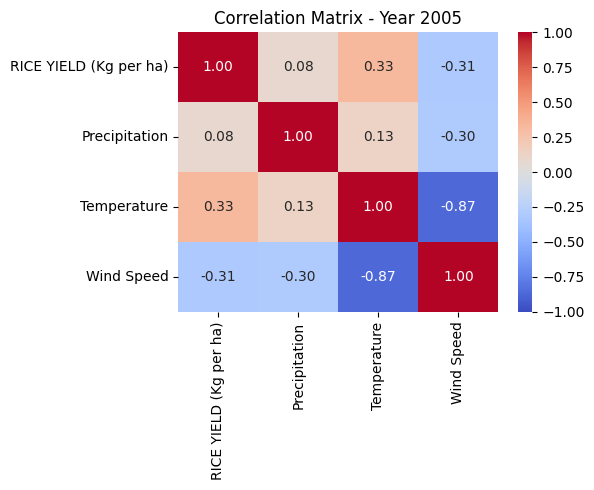

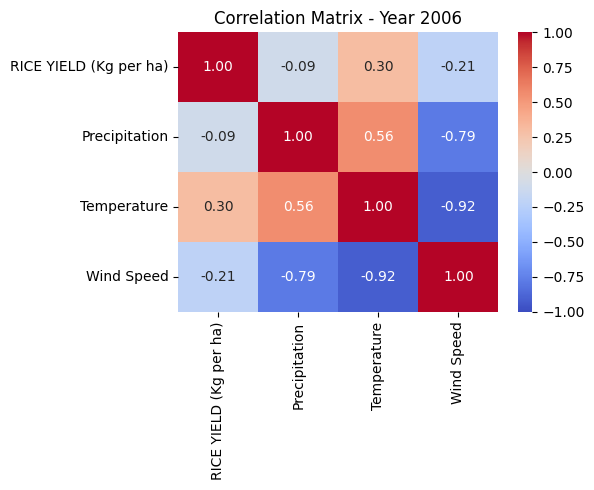

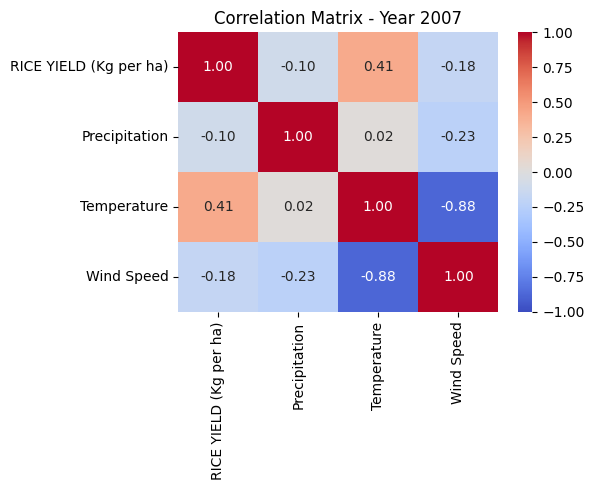

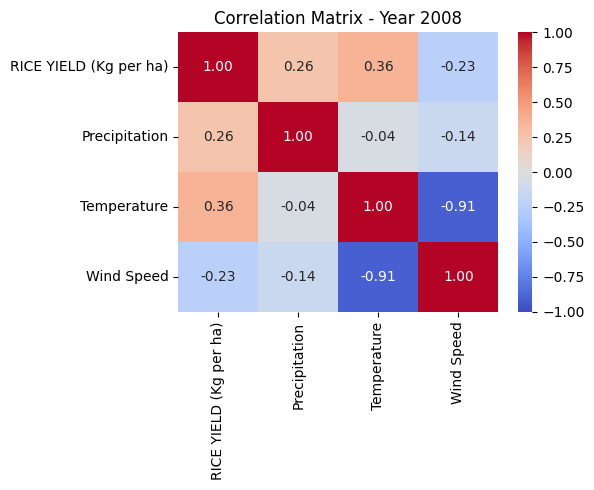

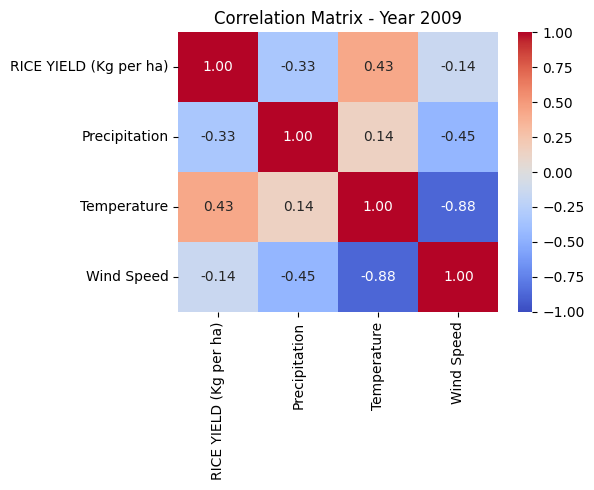

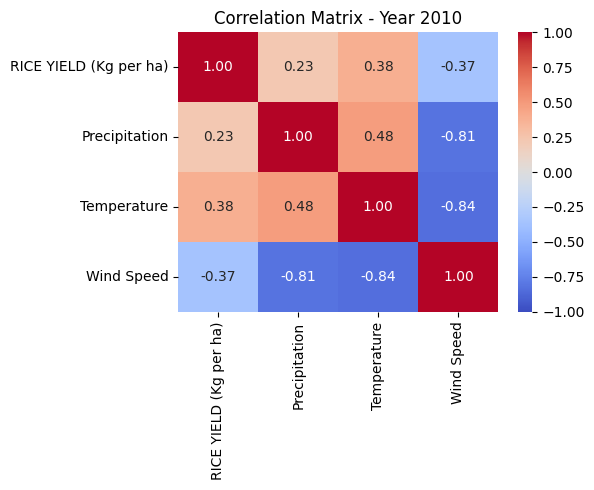

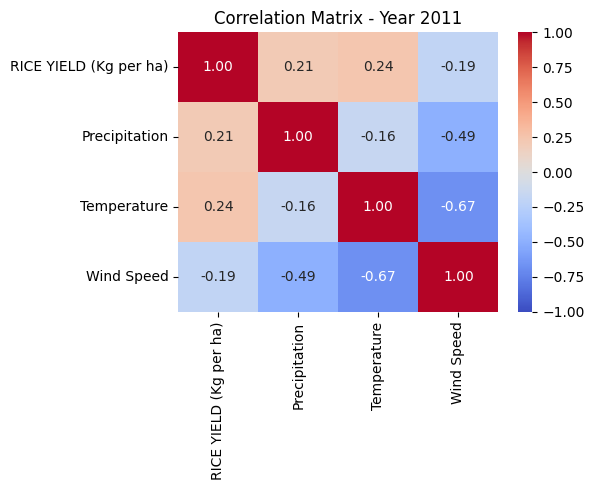

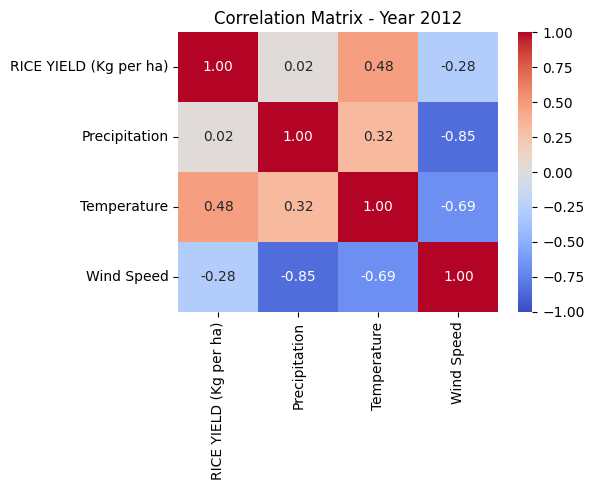

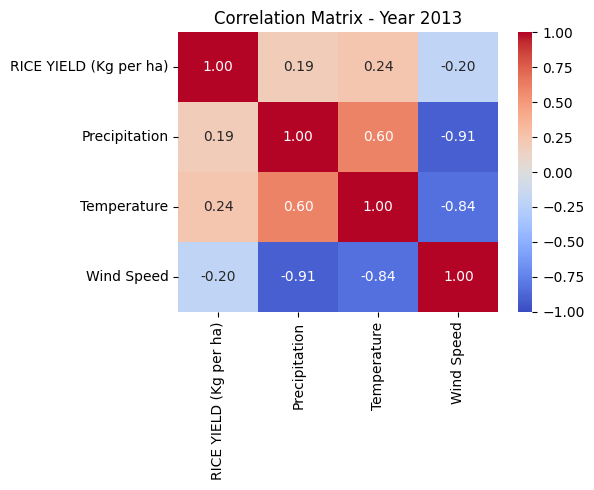

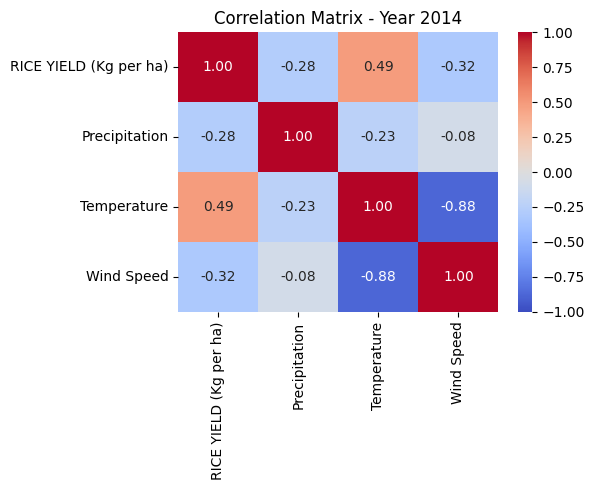

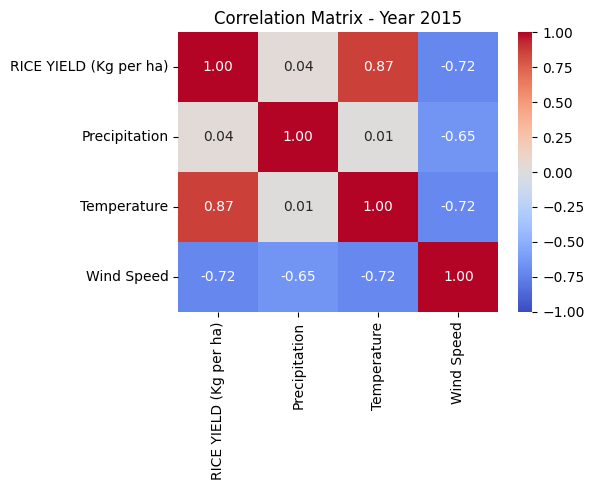

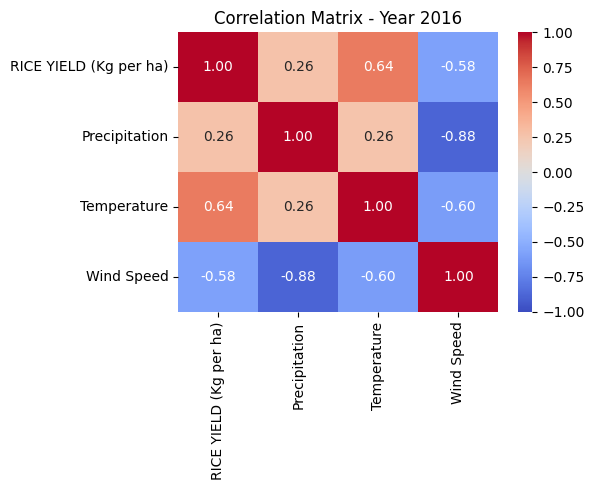

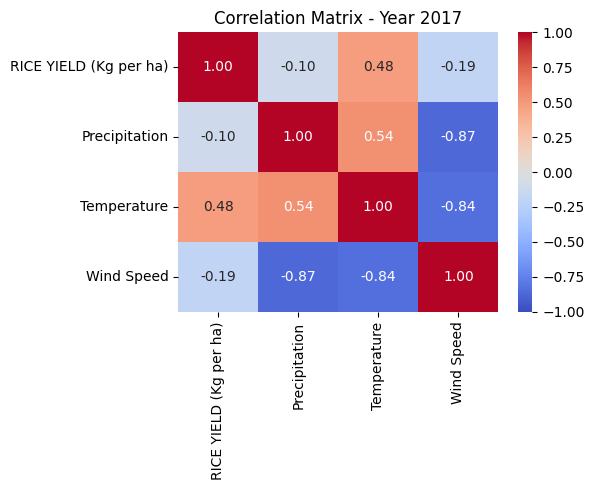

In [19]:
years = sorted(data['Year'].unique())

for year in years:
    yearly_data = data[data['Year'] == year]
    
    # Ensure enough data points to compute correlation
    if len(yearly_data) >= 5:  # adjust threshold as needed
        corr = yearly_data[cols_climate].corr()
        plt.figure(figsize=(6, 5))
        sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
        plt.title(f'Correlation Matrix - Year {year}')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Year {year} has too few records to compute reliable correlation.")
